<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 3</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$30^{th}$ October, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [2]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'nquiro2s'
member2 = 'slatou2s'

# Clustering[100 points]

In [3]:
#Headers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import sklearn
import sys
import os
from IPython.display import Image
from scipy import misc
import PIL as pil
from time import time
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from sklearn.metrics import pairwise_distances_argmin
#Include your other headers here

# Task 1: Image compression with K-means[50 points]

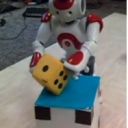

In [4]:
Image(filename='NAORelease.jpg')

### 1. Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg". As a feature vector use RGB-representation of each pixel from the image. Refer slide no-24 from MOGandEM.pdf (4th lecture)[30 points]

1. Initialization: pick K arbitrary centroids (cluster means)
2. Assign each sample to the closest centroid.
3. Adjust the centroids to be the means of the samples assigned to them.
4. Go to step 2 (until no change)

Kmeans clustering
Predicted time for our k-means
done in 0.826s.


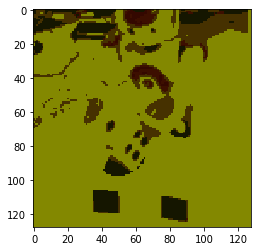

In [5]:
def readImage(imgName):
    img = plt.imread(imgName) 
   # img = img / 255
    return img

def distance_of_points(x1, y1, x2, y2):
    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist
    
def sampleClosestCentroid(img, k):
    #Function to assign each sample to the closest centroids
     # reshaping it or flattening it into a 2d matrix
    points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) 
    m, n = points.shape
    
    # means is the array of assumed means or centroids. 
    means = np.zeros((k, n)) 
  
    # random initialization of means. 
    for i in range(k):
        rand1 = int(np.random.random(1)*255)
        rand2 = int(np.random.random(1)*255)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
    return points, means
    
def adjustCentroidsMean(K, points, index, means):
    for i in range(K):    
            sumx = 0
            sumy = 0
            count = 0 
            for j in range(len(points)):    
                if(index[j] == i):
                    sumx += points[j, 0]
                    sumy += points[j, 1] 
                    count += 1
            if(count == 0):
                count = 1      
            means[i, 0] = float(sumx / count)
            means[i, 1] = float(sumy / count) 
    return means, index

def kMeansClustering(img, K):
    t0 = time()
    points, means = sampleClosestCentroid(img, K)
    iterations = 10
    m, n = points.shape
    index = np.zeros(m) 
    iterations = 2
    while(iterations > 0):
        for j in range(len(points)): 
            # initialize minimum value to a large value
            minv = 1000
            for i in range(K):
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[i, 0]
                y2 = means[i, 1]
                if(distance_of_points(x1, y1, x2, y2) < minv):         
                    minv = distance_of_points(x1, y1, x2, y2)
                    index[j] = i
        new_means,index = adjustCentroidsMean(K, points, index, means)
        if new_means.all == means.all:
            iterations = 0
    print("Predicted time for our k-means")
    print(f"done in {time() - t0:0.3f}s.")        
    return means, index

def compressImage(means, index, img):
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]
    # getting back the 3d matrix (row, col, rgb(3))
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], img.shape[2]))
    # plotting the compressed image.
    plt.imshow(recovered)
    plt.show()
    # saving the compressed image.
    plt.imsave('compressed.png', recovered)
    
if __name__ == '__main__': 
    
    print("Kmeans clustering")
    #Assign parameters
    K = 5
    #read image
    imgname = 'NAORelease.jpg'
    img = readImage(imgname)
    #Sample the initial centroids
    means, index = kMeansClustering(img/255, K)
    compressImage(means, index, img/255)

### 2. What are the parameters you played around what is your inference? Hint:- See which are the changeable ones- Hyperparameters[10 points]

The values that can be played with are the number of Ks, the initial positions of these Ks, and the number of iterations before finding the fixed points.
Both compromise image quality.

### 3. Compare your implementation with the existing k-mean algorithm given in sklearn. e.g running time[10 points]

Predicted time for our k-means
done in 1.412s.


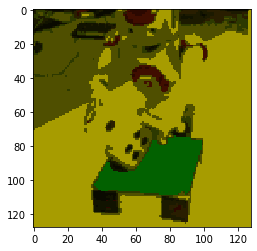

Predicting color indices on the full image (k-means)
done in 0.159s.


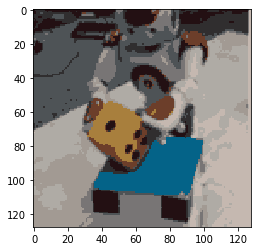

In [6]:
def library_version_k(img, K):
    robot = np.array(img, dtype=np.float64) / 255
    t0 = time()
    w, h, d = original_shape = tuple(robot.shape)
    assert d == 3
    image_array = np.reshape(robot, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=K, random_state=0).fit(image_array_sample)
   
    print("Predicting color indices on the full image (k-means)")
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

K = 10
imgname = 'NAORelease.jpg'
img = readImage(imgname)
means, index = kMeansClustering(img/255, K)
compressImage(means, index, img/ 255)
library_version_k(img, K)

**Your inference here**

# Task 2: Mixture of Gaussian, EM-Algorithm[50 points]

### Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:



- Follow the technical advises given in the lecture, namely run first k-means for the first 10-100 iterations (if required for the built in function its takes care by itself)
- Check if you need to add regularisation 
- Plot 
    1. Initial distribution - All the points should have same color.
    2. Soft assignment -  Assign the data points to the particular cluster only if their probability is above 0.9 others are to be considered as outliers. So give different color for all the outliers and clusters as shown in the second plot of the image (You should explore the way to do this).
    3. Hard assignment -  Each cluster should have different colors here you won't have outliers since the neighbouring datapoints are assigned to some clusters.
   
- All the clusters should have ellipsoids of three standard deviation. Kindly replicate the scene given in the image.

**Use sklearn**

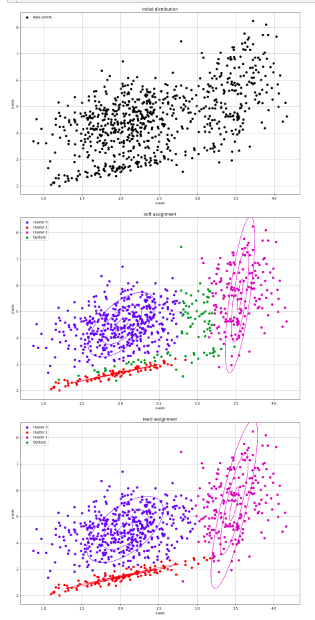

**Image is given only for dataset1, dataset2 the procedure is same so you should get the right plot.

## Dataset 1[35 points]

In [7]:
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    

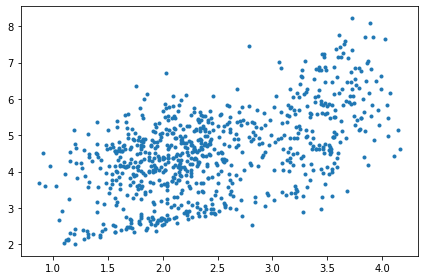

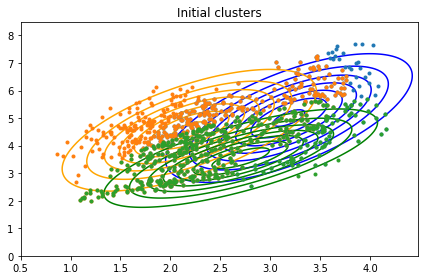

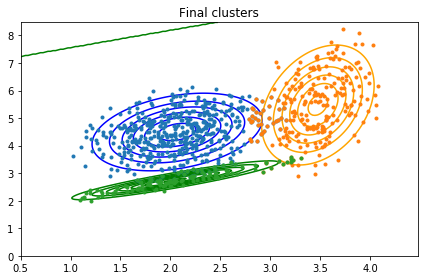

In [11]:
from scipy.spatial.distance import cdist
from numpy.linalg import inv

def remove_outliers(means, covs, data):
    new_data_1 = []
    new_data_2 = []
    new_data_3 = []
    
    mdist_1 = cdist(data, [means[0]], metric='mahalanobis', VI = inv(covs[0]).T)[:,0]
    d1 = mdist_1 < 2.5
    new_data_1 = data[d1]
    mdist_2 = cdist(data, [means[1]], metric='mahalanobis', VI = inv(covs[1]).T)[:,0]
    d2 = mdist_2 < 2.5
    new_data_2 = data[d2]
    mdist_3 = cdist(data, [means[2]], metric='mahalanobis', VI = inv(covs[2]).T)[:,0]
    d3 = mdist_3 < 2.5
    new_data_3 = data[d3]
    return new_data_1,new_data_2,new_data_3

def plotEllipsoids(new_data_1,new_data_2,new_data_3, means, covs, title, min_x):
    
    plt.figure()
    plt.plot(new_data_1[:, 0], new_data_1[:, 1], '.')
    plt.plot(new_data_2[:, 0], new_data_2[:, 1], '.')
    plt.plot(new_data_3[:, 0], new_data_3[:, 1], '.')
    k = means.shape[0]
    x = np.arange(min_x, 4.5,  0.025)
    y = np.arange(0, 8.5,  0.025)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    
    col = ['blue', 'orange', 'green']
    for i in range(3):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
    plt.title(title)
    plt.tight_layout() 

def algorithmEM(X, n_iters):
    n_components = 3
    tol = 1e-5
    n_row, n_col = X.shape     
    resp = np.zeros((n_row, n_components))
    
    # initialize parameters
    chosen = np.random.choice(n_row, 4, replace = False)
    means = X[chosen]
    weights = np.full(n_components, 1 / n_components)
    
    # for np.cov, rowvar = False, indicates that the rows represents obervation
    shape = n_components, n_col, n_col
    covs = np.full(shape, np.cov(X, rowvar = False))
    
    log_likelihood = 0
    converged = False
    log_likelihood_trace = []      

    for i in range(n_iters):
        #e step
        for k in range(n_components):
            prior = weights[k]
            likelihood = multivariate_normal(means[k], covs[k]).pdf(X)
            resp[:, k] = prior * likelihood
        log_likelihood_new = np.sum(np.log(np.sum(resp, axis = 1)))
        
        # normalize
        resp = resp / resp.sum(axis = 1, keepdims = 1)
        
        #m step
        resp_weights = resp.sum(axis = 0)
        weights = resp_weights / X.shape[0]
        weighted_sum = np.dot(resp.T, X)
        means = weighted_sum / resp_weights.reshape(-1, 1)
        for k in range(n_components):
            diff = (X - means[k]).T
            weighted_sum = np.dot(resp[:, k] * diff, diff.T)
            covs[k] = weighted_sum / resp_weights[k]    
        
        if abs(log_likelihood_new - log_likelihood) <= tol:
            converged = True
            break
            
        log_likelihood = log_likelihood_new
        log_likelihood_trace.append(log_likelihood)   
    
    return means, covs

    
if __name__ == '__main__':
    
    plt.plot(data[:, 0], data[:, 1], '.')
    plt.tight_layout()
    
    iterations = 1
    means, covs = algorithmEM(data, iterations)
    new_data_1,new_data_2,new_data_3 = remove_outliers(means, covs, data)
    plotEllipsoids(new_data_1,new_data_2,new_data_3, means, covs, 'Initial clusters', 0.5)
    
    
    iterations = 50
    means, covs = algorithmEM(data, iterations)
    new_data_1,new_data_2,new_data_3 = remove_outliers(means, covs, data)
    plotEllipsoids(new_data_1,new_data_2,new_data_3, means, covs, 'Final clusters', 0.5)
    

#### Explain the concept behind your ellipsoid plotting, like how you plotted it [5 points]

We use the function "contour" of library "matplotlib.pyplot" to plot a 3D surface on 2D plan. It takes 3 parameters $ [x,y,z] $ where $ [x,y] $ are positions on the plot and $ [z] $ is represent the contour level.  

$ z $ values are defined from $ [x,y] $ coordinates thanks to a function, here the multivariate normal distribution. Those that give a section plane where the curves separate the same particular values.  

$ [x,y] $ are declared using "numpy.meshgrid" function which creates a rectangular grid.  


## Dataset 2[10 points]

In [250]:
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
          np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
data = data[1:, :]

(400, 240) (400, 240) (400, 240)
(400, 240) (400, 240) (400, 240)
(400, 240) (400, 240) (400, 240)
(400, 240) (400, 240) (400, 240)
(400, 240) (400, 240) (400, 240)
(400, 240) (400, 240) (400, 240)


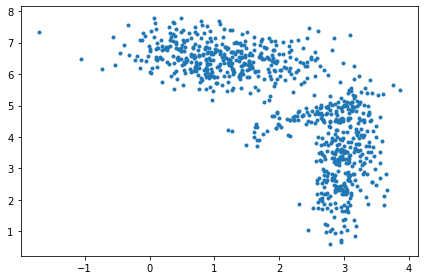

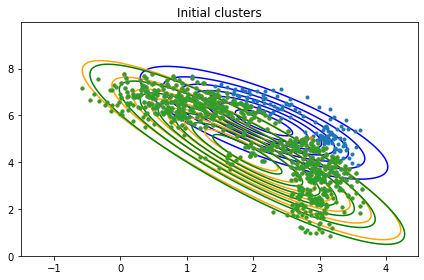

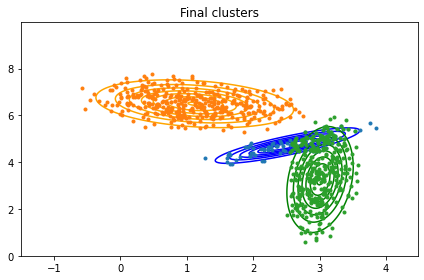

In [251]:
plt.plot(data[:, 0], data[:, 1], '.')
plt.tight_layout()
    
iterations = 1
means, covs = algorithmEM(data, iterations)
new_data_1,new_data_2,new_data_3 = remove_outliers(means, covs, data)
plotEllipsoids(new_data_1,new_data_2,new_data_3, means, covs, 'Initial clusters', -1.5)  
    
iterations = 50
means, covs = algorithmEM(data, iterations)
new_data_1,new_data_2,new_data_3 = remove_outliers(means, covs, data)
plotEllipsoids(new_data_1,new_data_2,new_data_3, means, covs, 'Final clusters', -1.5)
    